# Mentoring 1 - Introduction to Machine Learning
---

Mentoring Session - Job Preparation Program - Pacmann AI

## Instructions
---

1. Please fill all the given tasks in here
2. You can use any library
3. For modeling, please use `sklearn` library
4. You are taksed to create a function based machine learning model. (If you cannot create the functions from the start, you can create without a function first, then put it all into a function)
5. Make sure you are following all the function descriptions
6. Submit your result to the submission form

## Dataset Description
---

**Note**

- This dataset originally comes from [Uber Fares Dataset](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset)
- We perform several edit for this mentoring purposes. So, please use the dataset from [here](https://drive.google.com/file/d/1-Fr3OMbI1yKU_jNy-6cgXFJDVzjph3sn/view?usp=sharing).


**Description**
- We're looking to predict the fare of Uber's transactions.
- The dataset contains of the following fields

<center>

|Feature|Type|Descriptions|
|:--|:--|:--|
|`order_id`| `int` | a unique identifier for each trip|
|`pickup_time` | `str` | a class of pickup time. `04-10`, `10-16`, `16-22`, `22-04`. E.g. `04-10` means the pickup time is between 04.00 to 10.00|
| `pickup_longitude` | `float` | the longitude where the meter was engaged|
| `pickup_latitude` | `float` | the latitude where the meter was engaged|
| `dropoff_longitude` | `float` | the longitude where the meter was disengaged|
| `dropoff_latitude` | `float` | the latitude where the meter was disengaged|
| `passenger_count` | `float` | the number of passengers in the vehicle (driver entered value)|
| `fare_amount` | `int` | the cost of each trip in USD, (**our target**)|

## Modeling Workflow
---

```
1. Import data to Python
2. Data Preprocessing
3. Training a Machine Learning Models
4. Test Prediction
```

### 1. Import data to Python (10 pts)
---

In [358]:
!python3 --version


Python 3.11.6


In [359]:
!pip3 install -U pandas


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [360]:
####################################################
# Import Numpy and Pandas library
# Write your code here
####################################################
import numpy as np
import pandas as pd

# Import train-test splitting library dari sklearn (scikit learn)
from sklearn.model_selection import train_test_split

# import library dari gcollab agar table nya "that renders pandas dataframes into interactive displays"
#from google.colab import data_table
#data_table.enable_dataframe_formatter()

#from google.colab import drive
#drive.mount('/content/drive')

In [361]:
####################################################
# Create a function named read_data
# - Has an input of filename, i.e. fname
# - Read the data as a Pandas DataFrame
# - Drop duplicate on `order_id`, keep the last ones
# - Set `order_id` as index
# - Print the data shape
# - Return the dataset
# Write your code here
####################################################


# Membuat function import_data untuk memasukkan file-file dataset
def read_data(fname):
    try:

        read_data.df_raw = []
        read_data.check_dup_data = 0

        # mencari file dengan kata belakang .xlsx
        if fname.endswith('.xlsx'):
            df = pd.read_excel(fname)

        # mencari file dengan kata belakang .csv
        elif fname.endswith('.csv'):
            df = pd.read_csv(fname, sep = ',')

        # jika tidak ada file xlsx dan csv maka akan Raise Error
        else:
           raise ValueError(f"File tidak ditemukan {fname} harus berbentuk .xlsx atau .csv")

        # simpan utk dipakai print raw shape nanti next
        #df_shape_raw = df.shape
        read_data.df_raw.append(df.shape)

        # Check duplikat data pada col order_id
        read_data.check_dup_data = df[df.duplicated('order_id')].sum()

        # Drop duplikat data pada kolom 'order_id', dengan parameter keep 'last'
        clean_df = df.drop_duplicates(subset='order_id', keep='last')

        # Set 'order_id' sebagai index
        clean_df.set_index('order_id', inplace=True)

        return clean_df

    except Exception as e:
        print(f"Terdapat error ketika ...: {str(e)}")
        return None

In [362]:
# Read the Uber data (JUST RUN THE CODE)
data = read_data(fname='uber_edit.csv')

In [363]:
## Read the Uber data JUST RUN THE CODE
#duplicate_orderid = data.duplicated('order_id').sum()
#num_duplicates = duplicate_orderid.sum()

print(f"Data shape raw :  {read_data.df_raw}")
print(f"Number of duplicate order_id : {read_data.check_dup_data}")
print(f"Data shape after dropping : {data.shape}")
print(f"Data shape final : {data.shape}")

data.head(10)

Data shape raw :  [(194814, 8)]
Number of duplicate order_id : order_id               0
fare_amount          0.0
pickup_time            0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
dtype: object
Data shape after dropping : (194814, 7)
Data shape final : (194814, 7)


,fare_amount,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,,,
24238194,7.5,16-22,-73.999817,40.738354,-73.999512,40.723217,1.0
27835199,7.7,16-22,-73.994355,40.728225,-73.994710,40.750325,1.0
44984355,12.9,16-22,-74.005043,40.740770,-73.962565,40.772647,1.0
25894730,5.3,04-10,-73.976124,40.790844,-73.965316,40.803349,3.0
17610152,16.0,16-22,-73.925023,40.744085,-73.973082,40.761247,5.0
44470845,4.9,22-04,-73.969019,40.755910,-73.969019,40.755910,1.0
48725865,24.5,04-10,-73.961447,40.693965,-73.871195,40.774297,5.0
15822268,9.7,04-10,-73.975187,40.745767,-74.002720,40.743537,1.0
50611056,12.5,16-22,-74.001065,40.741787,-73.963040,40.775012,1.0


### 2. Data Preprocessing (60 pts)
---

**The processing pipeline**
```
2.1 Input-Output Split
2.2 Train-Valid-Test Split
2.3 Separate Numerical and Categorical Features
2.4 Numerical Imputation
2.5 Categorical Imputation
2.6 Preprocess Categorical Features
2.7 Join the Data
2.8 Feature Engineering the Data
2.9 Create a Preprocessing Function
```

#### 2.1. Input-Output Split (6 pts)
---

- We're going to split input & output according to the modeling objective.
- Create a function to split the input & output

In [364]:
####################################################
# Create a function named split_input_output
# - Has two arguments
#   - data, a pd Dataframe
#   - target_col, a column (str)
# - Print the data shape after splitting
# - Return X, y
# Write your code here
####################################################

def split_input_output(data, target_col):
    """
    This is a function for splitting data
    - Has two arguments
      data, a pd Dataframe
      target_col, a column (str)
    - Print the data shape after splitting
    - Return X, y

    Candra Kurniawan , Pacmann AI
    """
    try:
        # Memastikan target_column yang ingin di jadikan data input dan output ada
        if target_col not in data.columns:
            raise ValueError(f"The specified target column '{target_col}' is not present in the DataFrame.  ")

        # Splitting the data into input (X) and output (y)
        X = data.drop(target_col, axis = 1)
        y = data[target_col]

        # Print the shape of the data after splitting
        print(f"X shape: {X.shape}")
        print(f"y shape: {y.shape}")

        return X, y


    except Exception as e:
        print(f"Error in split_input_output function: {str(e)}")
        return None, None


In [365]:
# Load the train data only (JUST RUN THE CODE)
X, y = split_input_output(data=data,
                          target_col='fare_amount')

X shape: (194814, 6)
y shape: (194814,)


In [366]:
X.head()  # (JUST RUN THE CODE)

,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,,
24238194,16-22,-73.999817,40.738354,-73.999512,40.723217,1.0
27835199,16-22,-73.994355,40.728225,-73.994710,40.750325,1.0
44984355,16-22,-74.005043,40.740770,-73.962565,40.772647,1.0
25894730,04-10,-73.976124,40.790844,-73.965316,40.803349,3.0
17610152,16-22,-73.925023,40.744085,-73.973082,40.761247,5.0


In [367]:
y.head()  # (JUST RUN THE CODE)

order_id
24238194     7.5
27835199     7.7
44984355    12.9
25894730     5.3
17610152    16.0
Name: fare_amount, dtype: float64

#### 2.2. Train-Valid-Test Split (6 pts)
---

- Now, we want to split the data before modeling.
- Split the data into three set:
  - Train, for training the model
  - Validation, for choosing the best model
  - Test, for error generalization

- You should make the splitting proportion train (80%), valid (10%), and test (10%)

In [368]:
####################################################
# Create a function named split_train_test
# - Has two arguments
#   - X, the input (pd.Dataframe)
#   - y, the output (pd.Dataframe)
#   - test_size, the test size between 0-1 (float)
#   - seed, the random state (int)
# - Print the data shape after splitting
# - Return X_train, X_test, y_train, y_test
# - You can use an sklearn library to help you
# Write your code here
####################################################

# Import train-test splitting library dari sklearn (scikit learn)
from sklearn.model_selection import train_test_split

def split_train_test(X, y, test_size = 0.1, seed = None):
    """
    This is a function for splitting to training data, validatating data, & test data
    #   - Has Four arguments
    #   - X, the input (pd.Dataframe)
    #   - y, the output (pd.Dataframe)
    #   - test_size, the test size between 0-1 (float)
    #   - seed, the random state (int)

    Candra Kurniawan , Pacmann AI
    """
    try:
      # Split the data into train and test sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
      
      return X_train, X_test, y_train, y_test

    except Exception as e:
      print(f"Error in split_train_test function: {str(e)}")

      return None, None, None, None

In [369]:
# Split the data
# First, split the train & not train
X_train, X_not_train, y_train, y_not_train = split_train_test(X, y, test_size=0.2, seed=123)

# Then, split the valid & test
X_valid, X_test, y_valid, y_test = split_train_test(X_not_train, y_not_train, test_size = 0.5, seed = 123)


print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_not_train.shape}")
print(f"y test shape: {y_not_train.shape}")
print('')
print(f"X valid shape: {X_valid.shape}")
print(f"y valid shape: {y_valid.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (155851, 6)
y train shape: (155851,)
X test shape: (38963, 6)
y test shape: (38963,)

X valid shape: (19481, 6)
y valid shape: (19481,)
X test shape: (19482, 6)
y test shape: (19482,)


In [370]:
# Validate (JUST RUN THE CODE)
print(len(X_train)/len(X))  # should be 0.8
print(len(X_valid)/len(X))  # should be 0.1
print(len(X_test)/len(X))   # should be 0.1

0.7999989733797366
0.09999794675947314
0.1000030798607903


In [371]:
X_train.head()  # (JUST RUN THE CODE)

,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,,
51655713,16-22,-73.979392,40.735734,-73.906281,40.745539,2.0
37525839,16-22,-73.986575,40.761473,-73.981880,40.768660,5.0
55058970,16-22,-73.972533,40.782260,-73.952761,40.708980,1.0
15663447,10-16,-73.979967,40.751612,-73.976313,40.758427,6.0
13325650,16-22,-73.976192,40.744026,-73.980935,40.733946,1.0


#### 2.3. Separate Numerical and Categorical Features (6 pts)
---

- We now prepare to perform data preprocessing
- But, we first separate the data into numerical data & categorical data.

In [372]:
####################################################
# Create a function to split numerical & categorical input
# - you have three parameters
#   - data, an input data (pd. Dataframe)
#   - num_cols, a list of numerical columns (list)
#   - cat_cols, a list of categorical columns (list)
# - and write a validation that you perform right operation
# - and return two dataframe, numerical & categorical data
# Write your code here
####################################################

def split_column_numcat(data, num_cols, cat_cols):
      """
      This is a function for splitting the Training data column into
      Numerical and Categorical column :

      # Create a function to split numerical & categorical input
      # - you have three parameters
      #   - data, an input data (pd. Dataframe)
      #   - num_cols, a list of numerical columns (list)
      #   - cat_cols, a list of categorical columns (list)
      # - and write a validation that you perform right operation
      # - and return two dataframe, numerical & categorical data

      Candra Kurniawan , Pacmann AI
      """
      try:

          numerical_data = data[num_cols]
          categorical_data = data[cat_cols]

          print(f"Data num shape : {numerical_data.shape}")
          print(f"Data cat shape : {categorical_data.shape}")

          return numerical_data, categorical_data

      except Exception as e:
          print(f"Error in split_train_test function: {str(e)}")

          return None, None


In [373]:
# Ambil daftar nama kolom Numerikal
X_train_num_columns = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


# Ambil daftar nama kolom kategorikal
# Anda bisa langsung menuliskannya atau mengambil list jika jumlahnya banyak
X_train_column = list(X_train.columns)
X_train_cat_columns = list(set(X_train_column).difference(set(X_train_num_columns)))

In [374]:
# Split the data
X_train_num, X_train_cat = split_column_numcat(data = X_train, num_cols = X_train_num_columns, cat_cols = X_train_cat_columns)

Data num shape : (155851, 5)
Data cat shape : (155851, 1)


In [375]:
X_train_num.head()  # (JUST RUN THE CODE)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,
51655713,-73.979392,40.735734,-73.906281,40.745539,2.0
37525839,-73.986575,40.761473,-73.981880,40.768660,5.0
55058970,-73.972533,40.782260,-73.952761,40.708980,1.0
15663447,-73.979967,40.751612,-73.976313,40.758427,6.0
13325650,-73.976192,40.744026,-73.980935,40.733946,1.0


In [376]:
X_train_cat.head()  # (JUST RUN THE CODE)

,pickup_time
order_id,
51655713,16-22
37525839,16-22
55058970,16-22
15663447,10-16
13325650,16-22


#### EDA before Preprocessing (JUST RUN THE CODE)
---

- Find the number of missing values

In [377]:
100 * (X_train.isna().sum(0) / len(X_train))

pickup_time          0.000000
pickup_longitude     0.000000
pickup_latitude      0.000000
dropoff_longitude    0.000000
dropoff_latitude     0.000000
passenger_count      0.606348
dtype: float64

- We will impute all these variables if there is any missing value

- First, check the numerical features distribution

In [378]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

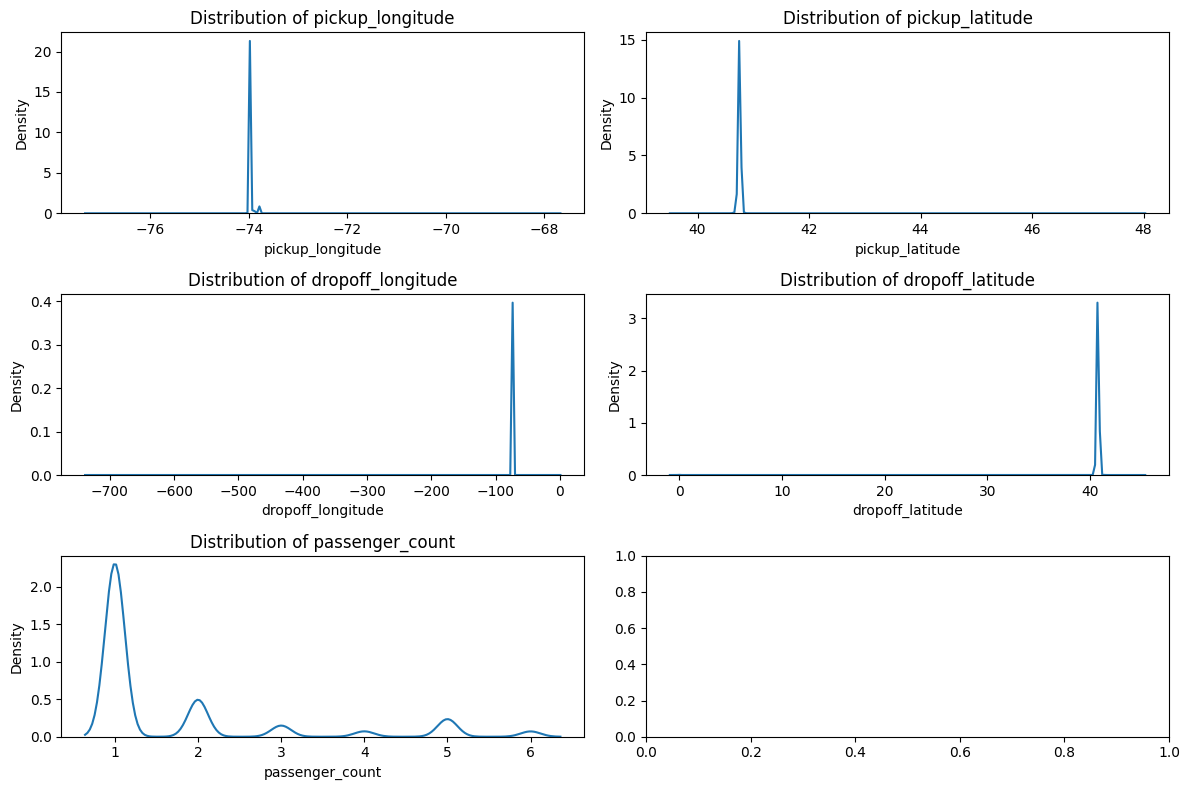

In [379]:
# Plot histogram
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_num.columns):
    sns.kdeplot(X_train_num[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

- All the distribution are skewed, we can impute a missing value by its features median.

- Next, explore the `pickup_time`

In [380]:
X_train['pickup_time'].value_counts(normalize=True)

pickup_time
16-22    0.328160
10-16    0.286376
22-04    0.221648
04-10    0.157599
-        0.006217
Name: proportion, dtype: float64

- There's a missing value with symbol `'-'` in `pickup_time`,
- We can impute the missing value with `UNKNOWN`

- Explore the relation between `pickup_time` and `fare`

In [381]:
# Concat the data first
train_data = pd.concat((X_train, y_train), axis=1)
train_data.head()

,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
order_id,,,,,,,
51655713,16-22,-73.979392,40.735734,-73.906281,40.745539,2.0,16.5
37525839,16-22,-73.986575,40.761473,-73.981880,40.768660,5.0,3.7
55058970,16-22,-73.972533,40.782260,-73.952761,40.708980,1.0,18.9
15663447,10-16,-73.979967,40.751612,-73.976313,40.758427,6.0,4.1
13325650,16-22,-73.976192,40.744026,-73.980935,40.733946,1.0,5.0


/Users/candra.kurniawan/Library/Python/3.11/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


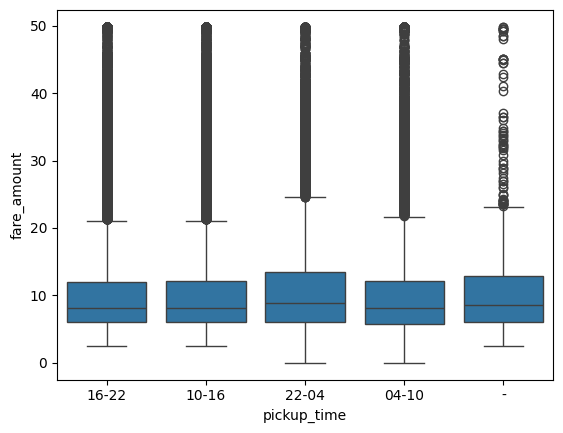

In [382]:
# Create a boxplot
sns.boxplot(data=train_data[train_data['fare_amount'] < 50],
            x='pickup_time',
            y='fare_amount')
plt.show()

- There is no significant fare different between `pickup_time`.
- We can perform a one hot encoding for this data.

**Conclusion for preprocessing**
- Impute the missing `passenger_counts` with its median
- Impute the missing `pickup_time` with `'UNKNOWN'`
- Feature engineering the `dropoff` and `pickup` coordinate to be a distance between pickup and dropoff. We can use an Euclidean distance for simplicity.

#### 2.4. Numerical Imputation (6 pts)
---

- Now, let's perform a numerical imputation
- First check the missing value of the numerical data

In [383]:
# Check missing value (JUST RUN THE CODE)
X_train_num.isna().sum()


pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
passenger_count      945
dtype: int64

- Create a function to fit a numerical features imputer

In [384]:
from sklearn.impute import SimpleImputer

In [385]:
X_train_num.isnull().any()

pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count       True
dtype: bool

In [386]:
####################################################
# Create function to fit & transform numerical imputers
# The fit function is called by num_imputer_fit
# - it needs 1 input, the data (pd.DataFrame)
# - the missing value is np.nan
# - the imputation strategy is median
# - it return the imputer
#
# The transform function is called by num_imputer_transform
# - it needs 2 input, data (pd.DataFrame) and imputer (sklearn object)
# - it return the imputed data in pd.DataFrame format
#
# Write your code here
####################################################

def num_imputer_fit(data):
    """
      This is a function for Imputing a data Numeric
      - have 2 argument, 
        1. input data (data), 
        #x2. numerical column target (numerical_column)
      - the missing value is np.nan
      - the imputation strategy is a median
      - it return the imputer

      Candra Kurniawan | Pacmann AI
      """
    
    try:
        # Membuat Imputer
        imputer_numerical = SimpleImputer(missing_values = np.nan,
                                          strategy = "median")
        # Fit imputer ke data X_train
        imputer_numerical.fit(data)

        return imputer_numerical
        
    except Exception as e:
          print(f"Error in imputing fit function: {str(e)}")

          return None

def num_imputer_transform(imputer_numerical, data):
    """
      This is a function for Transforming numeric data after apply Imputer
      - have 2 argument, 
        1. input data (data), 
        2. the imputer function (median strategy)
      The transform function is called by num_imputer_transform
      # - it needs 2 input, data (pd.DataFrame) and imputer (sklearn object)
      # - it return the imputed data in pd.DataFrame format

      Candra Kurniawan | Pacmann AI
      """
    
    try:
        # Begin Transforming
        imputed_data = imputer_numerical.transform(data)
        
        # After success Transform, then make it to a Dataframe Format
        X_train_num_imputed = pd.DataFrame(imputed_data, columns=data.columns, index=data.index)

        # After transforming the data need to give a column same as X_train_num
        #X_train_num_imputed = data.columns

        # and give Index to order_id , same as X_train_num Dataframe
        #X_train_num_imputed.index = data.index

        #print(f"{X_train_num_imputed.isna().sum(0)}")

        return X_train_num_imputed

    except Exception as e:
          print(f"Error in imputer transform fucntion : {str(e)}")

          return None

- Perform imputation

In [387]:
# Get the numerical imputer
num_imputer = num_imputer_fit(data = X_train_num)

# Transform the data
X_train_num_imputed = num_imputer_transform(data = X_train_num, imputer_numerical = num_imputer)

In [388]:
# Validate (JUST RUN THE CODE)
X_train_num_imputed.isna().sum()

pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [389]:
X_train_num_imputed.head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,
51655713,-73.979392,40.735734,-73.906281,40.745539,2.0
37525839,-73.986575,40.761473,-73.981880,40.768660,5.0
55058970,-73.972533,40.782260,-73.952761,40.708980,1.0
15663447,-73.979967,40.751612,-73.976313,40.758427,6.0
13325650,-73.976192,40.744026,-73.980935,40.733946,1.0


In [390]:
type(X_train_num_imputed)

pandas.core.frame.DataFrame

Great!

#### 2.5. Categorical Imputation (6 pts)
---

- Next, let's perform the categorical imputation

In [391]:
# Check missing value (JUST RUN THE CODE)
X_train_cat.value_counts(normalize=True)

pickup_time
16-22          0.328160
10-16          0.286376
22-04          0.221648
04-10          0.157599
-              0.006217
Name: proportion, dtype: float64

- Create a function to fit a categorical features imputer

In [392]:
####################################################
# Create function to fit & transform categorical imputers
# The fit function is called by cat_imputer_fit
# - it needs 1 input, the data (pd.DataFrame)
# - the missing value is '-'
# - the imputation strategy is filling it with 'UNKNOWN'
# - it return the imputer
#
# The transform function is called by cat_imputer_transform
# - it needs 2 input, data (pd.DataFrame) and imputer (sklearn object)
# - it return the imputed data in pd.DataFrame format
#
# Write your code here
####################################################

def cat_imputer_fit(data):
    """
    This is a function for create Imputer (Categorical data) to X_train data

    specs:  -> it have 1 input (data),
            -> the missing value parameter is '-'
            -> the imputation Strategy is filling it with 'UNKNOWN',
            -> then return the imputer.

    Candra Kurniawan | Pacmann AI 2024.

    """
    try:
        # Create categorical imputer

        imputer_categorical = SimpleImputer(missing_values = '-', strategy = 'constant',
                                            fill_value = 'UNKNOWN')
        
        # Fit the imputer to the input data
        imputer_categorical.fit(data)

        return imputer_categorical

    except Exception as e:
          print(f"Error in imputer categorical function : {str(e)}")

          return None
    
def cat_imputer_transform(imputer_categorical, data):
     """
     This is a function for Transform imputer to the X_train data.

    specs:  -> it have 2 input args ( imputer cat, data)
            -> it returning the imputed_data_cat.

    Candra Kurniawan | Pacmann AI 2024.
        
     """
     try:
        # begin transforming to the X_train_cat
        imputed_data = imputer_categorical.transform(data)
        
        # Fit and transform the categorical data
        X_cat_imputed = pd.DataFrame(imputed_data, columns = data.columns, index = data.index)

        return X_cat_imputed
     
     except Exception as e:
          print(f"Error in Transform categorical function : {str(e)}")

          return None
        

- Perform imputation

In [393]:
# Perform categorical imputation
cat_imputer = cat_imputer_fit(data = X_train_cat)

# Transform
X_train_cat_imputed = cat_imputer_transform(imputer_categorical = cat_imputer, data = X_train_cat)

In [394]:
# Validate (JUST RUN THE CODE)
X_train_cat_imputed.value_counts(normalize=True)

pickup_time
16-22          0.328160
10-16          0.286376
22-04          0.221648
04-10          0.157599
UNKNOWN        0.006217
Name: proportion, dtype: float64

In [395]:
X_train_cat_imputed.head(5)

,pickup_time
order_id,
51655713,16-22
37525839,16-22
55058970,16-22
15663447,10-16
13325650,16-22


Great!

#### 2.6. Preprocess Categorical Features (6 pts)
---

- We will create a one-hot-encoder (read the `EDA before processing`) for the categorical features
- Create a function to perform a one hot encoder

In [396]:
from sklearn.preprocessing import OneHotEncoder

In [399]:
####################################################
# Write two functions to perform OHE for the categorical data
# The first function is called cat_encoder_fit
# - It needs 1 input, the data (pd.DataFrame)
# - You create an encoder (from OHE Sklearn)
# - input all categories of the categorical data
# - if there is other category outside the categories listed right now, ignore it
# - return the encoder
#
# The second function is called cat_encoder_transfrom
# - It needs two input, the data (pd.DataFrame), the encoder (sklearn object)
# - It transform the input data based on the encoder
# - It returns the encoded data (pd.DataFrame)
#
# Write your code here
####################################################

def cat_encoder_fit(data):
    """ 
    Perform one-hot encoding on categorical data.

    Spec :  -> needs 1 input, the data (pd.DataFrame)
            -> You create an encoder (from OHE Sklearn)
            -> input all categories of the categorical data
            -> if there is other category outside the categories listed right now, ignore it
            -> return.
    """
    try:
    
        # Initialize the OneHotEncoder
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        
        # Fit the data with OHE
        encoder.fit(data)

        return encoder


    except Exception as e:

        print(f"Error in one-hot encoding function: {str(e)}")

        return None
    
def cat_encoder_transfrom(encoder, data, column):
    """ 
    This function for transforming categorical_data into OnehotEncoding

    Returns: one hot encoded pd.DataFrame, the one-hot encoded dataset.

    Candra Kurniawan | Pacmann AI 2024.
    """
    try:
        #one_hot_encoded = encoder.transform(data)

        #one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(data.columns), index=data.index)

        #return one_hot_encoded_df

        # Extract the specified column
        column_data = data[[column]]

        # Get the feature names directly from the unique values in the original column
        feature_names = data[column].unique()

        # Transform the data using the fitted encoder
        one_hot_encoded = encoder.transform(column_data)

        # Create a DataFrame with the one-hot encoded columns
        one_hot_encoded_df = pd.DataFrame(
            one_hot_encoded,
            columns=encoder.get_feature_names_out([column]), 
            index=data.index
        )

        return one_hot_encoded_df

    
    except Exception as e:

        print(f"Error when transforming OneHotEncoding function: {str(e)}")

        return None

In [400]:
X_train_cat_imputed.head()

,pickup_time
order_id,
51655713,16-22
37525839,16-22
55058970,16-22
15663447,10-16
13325650,16-22


- Perform imputation

In [401]:
# Perform categorical imputation
cat_encoder = cat_encoder_fit(data = X_train_cat_imputed)

# Transform
X_train_cat_encoded = cat_encoder_transfrom(encoder = cat_encoder, data = X_train_cat_imputed, column = 'pickup_time')

In [402]:
# Validate  (JUST RUN THE CODE)
print('Original shape:', X_train_cat_imputed.shape)
print('Encoded shape :', X_train_cat_encoded.shape)

Original shape: (155851, 1)
Encoded shape : (155851, 5)


In [403]:
# Validate  (JUST RUN THE CODE)
X_train_cat_encoded.head()

,pickup_time_04-10,pickup_time_10-16,pickup_time_16-22,pickup_time_22-04,pickup_time_UNKNOWN
order_id,,,,,
51655713,0.0,0.0,1.0,0.0,0.0
37525839,0.0,0.0,1.0,0.0,0.0
55058970,0.0,0.0,1.0,0.0,0.0
15663447,0.0,1.0,0.0,0.0,0.0
13325650,0.0,0.0,1.0,0.0,0.0


In [404]:
# Validate  (JUST RUN THE CODE)
X_train_cat_imputed.head()

,pickup_time
order_id,
51655713,16-22
37525839,16-22
55058970,16-22
15663447,10-16
13325650,16-22


In [405]:
# Validate  (JUST RUN THE CODE)
print(len(X_train_cat_imputed.columns))
print(len(X_train_cat_encoded.columns))


1
5


Great!

#### 2.7. Join the data (6 pts)
---

- After all the data is filled (numerically), we can join the data
- Create a function to join the data

In [406]:
####################################################
# Create a function to join / concat the data
# The function is called by concat_data
# - It needs two input, num_data (pd.DataFrame) and cat_data (pd.DataFrame)
# - Don't forget to validate your process
# - It returns the concated data
#
# Write your code here
####################################################

def concat_data(num_data, cat_data):
    """ 
    Perform concatenation onehotencoding data(X_train_cat_encoded)
    with train data (X_train_cat_imputed)

    Spec :  # It needs two input, num_data (pd.DataFrame) and cat_data (pd.DataFrame)
            # - Don't forget to validate your process
            # - It returns the concated data
    
    Candra Kurniawan | Pacmann AI 2024

    """
    try:
        concat = pd.concat([num_data, cat_data], axis = 1)

        return concat
    
    except Exception as e:
        
        print(f"Error when concatenating OHE and train cat data: {str(e)}")

        return None

- Perform concatenated

In [407]:
# Concat the data
X_train_concat = concat_data(num_data = X_train_num_imputed, cat_data = X_train_cat_encoded)

print(f"Numerical data shape    : {X_train_num_imputed.shape}")
print(f"Categorical data shape  : {X_train_cat_encoded.shape}")
print(f"Concat data shape       : {X_train_concat.shape}")

Numerical data shape    : (155851, 5)
Categorical data shape  : (155851, 5)
Concat data shape       : (155851, 10)


In [408]:
# Validate (JUST RUN THE CODE)
X_train_concat.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_time_04-10,pickup_time_10-16,pickup_time_16-22,pickup_time_22-04,pickup_time_UNKNOWN
order_id,,,,,,,,,,
51655713,-73.979392,40.735734,-73.906281,40.745539,2.0,0.0,0.0,1.0,0.0,0.0
37525839,-73.986575,40.761473,-73.981880,40.768660,5.0,0.0,0.0,1.0,0.0,0.0
55058970,-73.972533,40.782260,-73.952761,40.708980,1.0,0.0,0.0,1.0,0.0,0.0
15663447,-73.979967,40.751612,-73.976313,40.758427,6.0,0.0,1.0,0.0,0.0,0.0
13325650,-73.976192,40.744026,-73.980935,40.733946,1.0,0.0,0.0,1.0,0.0,0.0


Great!

#### 2.8. Feature engineering the data (8 pts)
---

- Now, `pickup` and `dropoff` coordinate is not an explicit features.
- We can create a better feature called by `distance` to summarize the `pickup` and `dropoff` coordinate.

In [409]:
####################################################
# Create a function that obtain the distance
# The function is called with map_distance
# - It needs an input, data (pd.DataFrame)
# - In the input, you calculate the trip distance using Euclidean Distance
#   ref: https://www.cuemath.com/euclidean-distance-formula/
# - Then, you can save the distance information as a new column, 'distance'
# - And you can drop the pickup and dropoff latitude and longitude
# - You return the mapped data
#
# Write your code here
####################################################

def euclidean_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the Euclidean distance between two points given their latitude and longitude.

    Parameters:
    - lat1, lon1: Latitude and longitude of the first point.
    - lat2, lon2: Latitude and longitude of the second point.

    Returns:
    - distance: Euclidean distance between the two points.
    """
    return np.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)

def map_distance(data):
    try:
        # Create a new DataFrame to store the calculated distance column
        distance_df = pd.DataFrame(index=data.index)

        # Calculate Euclidean distance and add a new column 'distance'
        distance_df['distance'] = euclidean_distance(data['pickup_latitude'], data['pickup_longitude'],
                                               data['dropoff_latitude'], data['dropoff_longitude'])
        
        # Concatenate the original DataFrame with the distance DataFrame
        mapped_data = pd.concat([data, distance_df], axis=1)

        # Drop pickup and dropoff latitude and longitude columns from the original DataFrame
        mapped_data.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)

        return mapped_data

    except Exception as e:
        print(f"Error in mapping distance function: {str(e)}")
        return None

- Perform distance calculation (4 pts)

In [410]:
# Calculate the distance
X_train_concat_fe = map_distance(data = X_train_concat)

print(f"Original data shape: {X_train_concat.shape}")
print(f"Mapped data shape  : {X_train_concat_fe.shape}")

Original data shape: (155851, 10)
Mapped data shape  : (155851, 7)


In [411]:
# Validate (JUST RUN THE CODE)
X_train_concat_fe.head()

,passenger_count,pickup_time_04-10,pickup_time_10-16,pickup_time_16-22,pickup_time_22-04,pickup_time_UNKNOWN,distance
order_id,,,,,,,
51655713,2.0,0.0,0.0,1.0,0.0,0.0,0.073766
37525839,5.0,0.0,0.0,1.0,0.0,0.0,0.008585
55058970,1.0,0.0,0.0,1.0,0.0,0.0,0.075901
15663447,6.0,0.0,1.0,0.0,0.0,0.0,0.007733
13325650,1.0,0.0,0.0,1.0,0.0,0.0,0.011140


- And finally, we standardize the data so that it can perform well during model optimization (4 pts)

In [412]:
from sklearn.preprocessing import StandardScaler


In [413]:
####################################################
# Create two functions to perform scaling & transform scaling
# The scaling is Standardization
# The first function is to fit the scaler, called by fit_scaler
# - You need an input, a data (pd.Dataframe)
# - You create a standardization scaler (please use sklearn)
# - Your output is the scaler
#
# The second function is to transform data using scaler, called by transform_scaler
# - There are two inputs, a data (pd.Dataframe), a scaler (sklearn object)
# - You scaled the data, then return the scaled data
# Write your code here
####################################################

def fit_scaler(data):
    """
    Fit a StandardScaler to the data.

    Parameters:
    - data: The input data (pd.DataFrame).

    Returns:
    - scaler: The fitted StandardScaler object.
    """
    try:
        scaler = StandardScaler()

        scaler.fit(data)

        return scaler
    
    except Exception as e:

        print(f"Error in standard scaler fit function: {str(e)}")
        
        return None

def transform_scaler(scaler, data):
    """
    Transform the data using a fitted StandardScaler.

    Parameters:
    - scaler: The fitted StandardScaler object.
    - data: The input data (pd.DataFrame) to be transformed.

    Returns:
    - scaled_data: The transformed data.
    """

    try:
        scaled_data = scaler.transform(data)

        return pd.DataFrame(scaled_data, columns=data.columns, index=data.index)
    
    except Exception as e:

        print(f"Error in standard scaler transform function: {str(e)}")

        return None


In [414]:
# Fit the scaler
scaler = fit_scaler(data = X_train_concat_fe)

# Transform the scaler
X_train_clean = transform_scaler(scaler = scaler, data = X_train_concat_fe)

In [415]:
# Validate (JUST RUN THE CODE)
X_train_clean.describe().round(4)

,passenger_count,pickup_time_04-10,pickup_time_10-16,pickup_time_16-22,pickup_time_22-04,pickup_time_UNKNOWN,distance
count,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0383
25%,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0340
50%,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0311
75%,0.2412,-0.4325,1.5786,1.4308,-0.5336,-0.0791,-0.0256
max,3.3130,2.3120,1.5786,1.4308,1.8739,12.6427,218.5245


Great!

#### 2.9. Create the preprocess function (10 pts)
---

- Now, let's create a function to preprocess other set of data (valid & test) so that we can predict that

In [536]:
####################################################
# Create a function to preprocess the dataset
# You called the function preprocess_data
# - It needs many input
#   - data, pd.DataFrame
#   - num_cols, the numerical columns, list
#   - cat_cols, the categorical columns, list
#   - num_imputer, the numerical imputer, sklearn object
#   - cat_imputer, the categorical imputer, sklearn object
#   - cat_encoder, the categorical encoder, sklearn object
#   - scaler, the data scaler, sklearn object
# - You preprocess the data following step 2.3 - 2.8
# - You return the clean data
#
# Write your code here
####################################################

def preprocess_data(data, num_cols, cat_cols, num_imputer, cat_imputer, cat_encoder, scaler):
    """ 
    This is a function to preprocess the dataset
    Specs : -> data, pd.DataFrame
            -> num_cols, the numerical columns, list
            -> cat_cols, the categorical columns, list
            -> num_imputer, the numerical imputer, sklearn object
            -> cat_imputer, the categorical imputer, sklearn object
            -> cat_encoder, the categorical encoder, sklearn object
            -> scaler, the data scaler, sklearn object
    """
    try:
        
        # 2.3 Pertama membuat splitting data numerical dan Categorical
        numerical_data = data[num_cols]
        categorical_data = data[cat_cols]

        # 2.4 Membuat fungsi Numerical imputation (num_imputer)
        # Membuat Imputer
        num_imputer_trigger = num_imputer(numerical_data)
        # Transform the numerical data
        numerical_data_imputed = num_imputer_transform(data = numerical_data, imputer_numerical = num_imputer_trigger)

        # 2.5 Membuat fungsi Categorical imputation (cat_imputer)
        cat_imputer_trigger = cat_imputer(categorical_data)
        # Transform the categorical data
        categorical_data_imputed = cat_imputer_transform(imputer_categorical = cat_imputer_trigger, data = categorical_data)

        # 2.6 Membuat fungsi fit & Transform OneHotEncoding into Categorical data
        # Fit
        cat_encoder_trigger = cat_encoder(categorical_data_imputed)
        # Transform encoding OneHotEncoder
        categorical_data_encoded = cat_encoder_transfrom(encoder = cat_encoder_trigger, data = categorical_data_imputed, column = 'pickup_time')
        
        # 2.7 membuat fungsi Concat data numerical imputed dengan categorical encoded
        concat_num_cat_data = concat_data(num_data = numerical_data_imputed, cat_data = categorical_data_encoded)

        # 2.8 Feature engineering (menghitung jarak dari titik berangkat ke titik sampai dengan Euclidean distance)
        X_data_cleaned = map_distance(data = concat_num_cat_data)

        # 2.8.2 And finally, we standardize the data so that it can perform well during model optimization (StandardScaler)
        # Fit the standardscaler
        standardscaler = scaler(data = X_data_cleaned)
        # Transform the scaler
        X_data_scaled = transform_scaler(scaler = standardscaler, data = concat_distance_data)

        return numerical_data_imputed, categorical_data_imputed, categorical_data_encoded, concat_num_cat_data, X_data_cleaned, X_data_scaled

    except Exception as e:
          print(f"Error in function: {str(e)}")

          return None

In [537]:
X_train_num_tested, X_train_cat_tested, X_train_cat_encoded_tested, concat_num_cat_data, X_data_cleaned, X_data_scaled = preprocess_data(data = X_train, 
                                                         num_cols = X_train_num_columns, 
                                                         cat_cols = X_train_cat_columns,
                                                         num_imputer = num_imputer_fit, 
                                                         cat_imputer = cat_imputer_fit,
                                                         cat_encoder = cat_encoder_fit,
                                                         scaler = fit_scaler)

In [533]:
X_data_scaled.describe().round(4)

,passenger_count,pickup_time_04-10,pickup_time_10-16,pickup_time_16-22,pickup_time_22-04,pickup_time_UNKNOWN,distance
count,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0383
25%,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0340
50%,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0311
75%,0.2412,-0.4325,1.5786,1.4308,-0.5336,-0.0791,-0.0256
max,3.3130,2.3120,1.5786,1.4308,1.8739,12.6427,218.5245


In [ ]:
# Validate (JUST RUN THE CODE)
print(len(X_train)/len(X))  # should be 0.8
print(len(X_valid)/len(X))  # should be 0.1
print(len(X_test)/len(X))   # should be 0.1

0.7999989733797366
0.09999794675947314
0.1000030798607903


In [ ]:
#X valid shape: (19481, 6)
#y valid shape: (19481,)
##X test shape: (19482, 6)
#y test shape: (19482,)

In [ ]:
# Preprocess the data training again
X_train_clean = # WRITE YOUR CODE HERE

SyntaxError: invalid syntax (3193506559.py, line 2)

In [ ]:
# Validate (JUST RUN THE CODE)
print('Original data shape:', X_train.shape)
print('Cleaned data shape :', X_train_clean.shape)
X_train_clean.head()

In [ ]:
# Transform other set of data
X_valid_clean = # WRITE YOUR CODE HERE
X_test_clean = # WRITE YOUR CODE HERE

### 3. Training Machine Learning Models (40 pts)
---

```
3.1 Prepare train & evaluate model function
3.2 Train & evaluate several models
3.3 Choose the best model
```

#### 3.1. Preprare train & evaluate model function (10 pts)
---

- Before modeling, let's prepare function to train & evaluate model

In [ ]:
####################################################
# First, create a function to train model called train_model
# - It needs 3 input
#   - estimator, the model (sklearn model)
#   - X_train, the input (pd.DataFrame)
#   - y_train, the output (pd.DataFrame)
# - You only fit the estimator using the X_train & y_train
# - Then return nothing
#
# Next, create a function to evaluate model called evaluate_model
# - It needs 5 input
#   - estimator, the model (sklearn model)
#   - X_train, the train input (pd.DataFrame)
#   - y_train, the train output (pd.DataFrame)
#   - X_valid, the valid input (pd.DataFrame)
#   - y_valid, the valid output (pd.DataFrame)
# - You calculate the model performance using root mean squared error metrics
# - Then return two output, rmse_train and rmse_valid
#
# Write your code here
####################################################


#### 3.2. Train and Evaluate Several Models (10 pts)
---

- Now, let's train & evaluate several models
- You should check, which one of the following model is the best model

  1. Baseline model
  2. k-NN with k=1
  3. k-NN with k=100
  4. k-NN with k=200
  5. k-NN with k=500
  6. k-NN with k=len(data)

In [ ]:
####################################################
# Create your model here (no need to create function)
# Write your code here
####################################################
reg_1 = # Write your code here, follow the description
reg_2 = # Write your code here, follow the description
reg_3 = # Write your code here, follow the description
reg_4 = # Write your code here, follow the description
reg_5 = # Write your code here, follow the description
reg_6 = # Write your code here, follow the description

In [ ]:
# Train the model (JUST RUN THE CODE)
train_model(reg_1, X_train_clean, y_train)
train_model(reg_2, X_train_clean, y_train)
train_model(reg_3, X_train_clean, y_train)
train_model(reg_4, X_train_clean, y_train)
train_model(reg_5, X_train_clean, y_train)
train_model(reg_6, X_train_clean, y_train)

In [ ]:
# Return validation (JUST RUN THE CODE)
import time

for reg in [reg_1, reg_2, reg_3, reg_4, reg_5, reg_6]:
    t0 = time.time()

    # Generate the rmse
    rmse_train, rmse_valid = evaluate_model(estimator=reg,
                                            X_train=X_train_clean,
                                            y_train=y_train,
                                            X_valid=X_valid_clean,
                                            y_valid=y_valid)

    # Logging
    elapsed = time.time() - t0
    print(f'model : {str(reg):40s} '
          f'| RMSE train: {rmse_train:.4f} '
          f'| RMSE valid: {rmse_valid:.4f} '
          f'| Time elapsed: {elapsed*1000:.2f} ms')

#### 3.3. Choose the best model (20 pts)
---

From the previous results, which one is the best model? (10 pts)

```
Answer in this section (you can use bahasa)
```

Why do you choose that model? (10 pts)

```
Explain your answer in here (you can use bahasa)
```

And, create a `reg_best` to store the best model

In [ ]:
# Write your code here
reg_best = # Write your code here

### 4. Predictions & Evaluations (JUST RUN THE CODE)
---

```
4.1 Predict & Evaluate on the Train Data
4.2 Predict & Evaluate on the Test Data
```

#### 4.1. Predict & evaluate on train data
---

In [ ]:
# Predict (JUST RUN THE CODE)
y_train_pred = reg_best.predict(X_train_clean)

In [ ]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_train, y_train_pred)

plt.plot([0, 200], [0, 200], c='red')
plt.xlim(0, 200); plt.ylim(0, 200)
plt.xlabel('y actual'); plt.ylabel('y predicted')
plt.title('Comparison of y actual vs y predicted on Train Data')
plt.show()

#### 4.2. Predict & evaluate on test data
---

In [ ]:
# Predict (JUST RUN THE CODE)
y_test_pred = reg_best.predict(X_test_clean)

In [ ]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_test, y_test_pred)

plt.plot([0, 200], [0, 200], c='red')
plt.xlim(0, 200); plt.ylim(0, 200)
plt.xlabel('y actual'); plt.ylabel('y predicted')
plt.title('Comparison of y actual vs y predicted on Test Data')
plt.show()